# Note
- graph 의 타당성을 체크하는 메서드이긴 한데, 이걸 잘 쓸지는 의문 
- d - seperation 을 이루는 모든 쌍에 대해서 independence test 를 수행하고 , 하나라도 만족 못하면 False 인데 너무 빡빡한거? 아닌지... 

In [1]:
!pip install dowhy
# pygraphviz install 
!apt install libgraphviz-dev
!pip install pygraphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 6.4 MB/s 
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 5 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,

In [2]:
import numpy as np
import pandas as pd
import os, sys
import dowhy
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
# randomly generated directed graph 를 만들어내는 method
from dowhy import datasets
# prob_type_of_data : 3-element tuple containing the probability of data being discrete, binary and continuous respectively.(Should add up to 1)
# num_vars : Number of variables in the dataset 
# num_samples: Number of samples in the dataset 
#  prob_edge : Probability of an edge between two random nodes in a graph 
#  random_seed: Seed for generating random graph
data = datasets.dataset_from_random_graph(num_vars = 10,
                                                num_samples = 5000,
                                                prob_edge = 0.3,
                                                random_seed = 100,
                                                prob_type_of_data = (0.333, 0.333, 0.334))
df = data["df"] #Insert dataset here
print(data["discrete_columns"], data["continuous_columns"], data["binary_columns"])
print(df.head())

['a', 'c', 'e', 'f', 'h'] ['b', 'd', 'g', 'i', 'j'] ['c', 'e']
   a         b  c         d  e  f         g  h         i         j
0 -1 -1.170054  1  0.996507  1  0 -0.218214 -1 -1.107993  0.699933
1  0  0.527130  1  0.894435  1  1  1.485562  0 -1.450727 -1.055649
2  0  0.436049  0 -0.151908  0  0  0.195296  0  2.280391  1.162284
3  0  0.005213  1  0.347139  1  0 -0.727156 -1 -1.140999 -2.165819
4  0  1.212397  0 -1.230150  0  1  0.582913  0 -1.377051 -2.359753


In [28]:

print(data["discrete_columns"], data["continuous_columns"], data["binary_columns"])


['a', 'c', 'e', 'f', 'h'] ['b', 'd', 'g', 'i', 'j'] ['c', 'e']


In [16]:
graph_string = """graph [
  directed 1
  node [
    id 0
    label "a"
  ]
  node [
    id 1
    label "b"
  ]
  node [
    id 2
    label "c"
  ]
  node [
    id 3
    label "d"
  ]
  node [
    id 4
    label "e"
  ]
  node [
    id 5
    label "f"
  ]
  node [
    id 6
    label "g"
  ]
  node [
    id 7
    label "h"
  ]
  node [
    id 8
    label "i"
  ]
  node [
    id 9
    label "j"
  ]
  edge [
    source 0
    target 1
  ]
  edge [
    source 0
    target 8
  ]
  edge [
    source 1
    target 2
  ]
  edge [
    source 1
    target 5
  ]
  edge [
    source 2
    target 3
  ]
  edge [
    source 2
    target 4
  ]
  edge [
    source 3
    target 4
  ]
  edge [
    source 4
    target 5
  ]
  edge [
    source 5
    target 6
  ]
  edge [
    source 6
    target 7
  ]
  edge [
    source 7
    target 8
  ]
  edge [
    source 8
    target 9
  ]
]
"""

In [17]:
from dowhy import CausalModel
import dowhy.datasets

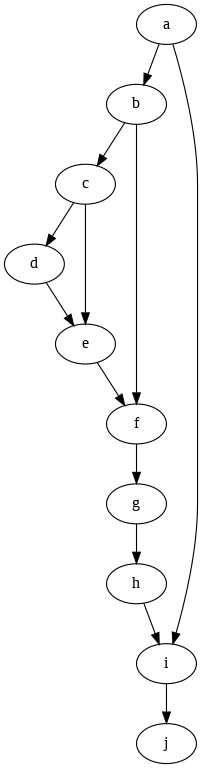

In [18]:
model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=graph_string
        )
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

We can check if the assumptions of the graph hold true for the data using model.refute_graph(k, independence_test = {'test_for_continuous': 'partial_correlation', 'test_for_discrete' : 'conditional_mutual_information'}) 
- We are testing X ⫫ Y | Z where X and Y are singular sets and Z can have k number of variables. 
- k value is 1 by default unless input. 
- Currently we are using following settings 
    - “partial_correlation” for continuous data 
    - “conditional_mutual_information” for discrete data 
    - “conditional_mutua_information” when Z is discrete and either of X and Y is continuous 
    - “partial_correlation” when Z is continuous/binary and X and Y are either continuous/binary 
    - “conditional_mutual_information” when X and Y are discrete and Z has mixed data 
- other settings are currently not supported

In [42]:
refuter_object = model.refute_graph(k=1,
                                    independence_test = {'test_for_continuous': 'partial_correlation', 'test_for_discrete' : 'conditional_mutual_information'}) 
# Change k parameter to test conditional independence given different number of variables

The following setting with j as continuous, f as discrete, ('i',) as ['continuous'] not supported
The following setting with j as continuous, a as discrete, ('i',) as ['continuous'] not supported
The following setting with j as continuous, h as discrete, ('i',) as ['continuous'] not supported
The following setting with d as continuous, g as continuous, ('f',) as ['discrete'] not supported
The following setting with d as continuous, a as discrete, ('b',) as ['continuous'] not supported
The following setting with d as continuous, h as discrete, ('g',) as ['continuous'] not supported
The following setting with b as continuous, g as continuous, ('f',) as ['discrete'] not supported
The following setting with b as continuous, h as discrete, ('g',) as ['continuous'] not supported
The following setting with g as continuous, a as discrete, ('b',) as ['continuous'] not supported


In [37]:
print(refuter_object)

Method name for discrete data:conditional_mutual_information
Method name for continuous data:partial_correlation
Number of conditional independencies entailed by model:235
Number of independences satisfied by data:119
Test passed:True



In [40]:
refuter_object = model.refute_graph(independence_constraints = [('c', 'e' , ('g',)), # c and e - binary, g - continuous
                                                                ('f', 'h' , ('b',)), # f and h - discrete, b - continuous
                                                                ('e', 'g' , ('h',)), # e - binary, g - continuous, h - discrete
                                                                ('c', 'a' , ('b',)), # c and a - discrete, b - continuous
                                                                ('d', 'i' , ('c',)), # d and i - continuous, c - binary
                                                                ('a', 'j' , ())      # a - discrete, j - continuous
                                                               ],
                         independence_test = {'test_for_continuous': 'partial_correlation', 'test_for_discrete' : 'conditional_mutual_information'}
                        )

In [41]:
print(refuter_object)

Method name for discrete data:conditional_mutual_information
Method name for continuous data:partial_correlation
Number of conditional independencies entailed by model:6
Number of independences satisfied by data:6
Test passed:True



In [43]:
graph_string = """graph [
        directed 1
        node [
            id 0
            label "a"
        ]
        node [
            id 1
            label "b"
        ]
        node [
            id 2
            label "c"
        ]
        node [
            id 3
            label "d"
        ]
        node [
            id 4
            label "e"
        ]
        node [
            id 5
            label "f"
        ]
        node [
            id 6
            label "g"
        ]
        node [
            id 7
            label "h"
        ]
        node [
            id 8
            label "i"
        ]
        node [
            id 9
            label "j"
        ]
        edge [
            source 0
            target 1
        ]
        edge [
            source 0
            target 2
        ]
        edge [
            source 0
            target 3
        ]
        edge [
            source 1
            target 4
        ]
        edge [
            source 1
            target 5
        ]
        edge [
            source 2
            target 3
        ]
        edge [
            source 4
            target 2
        ]
        edge [
            source 4
            target 5
        ]
        edge [
            source 4
            target 6
        ]
        edge [
            source 4
            target 7
        ]
        edge [
            source 8
            target 6
        ]
        edge
        [
        source 9
        target 0
        ]
        ]"""

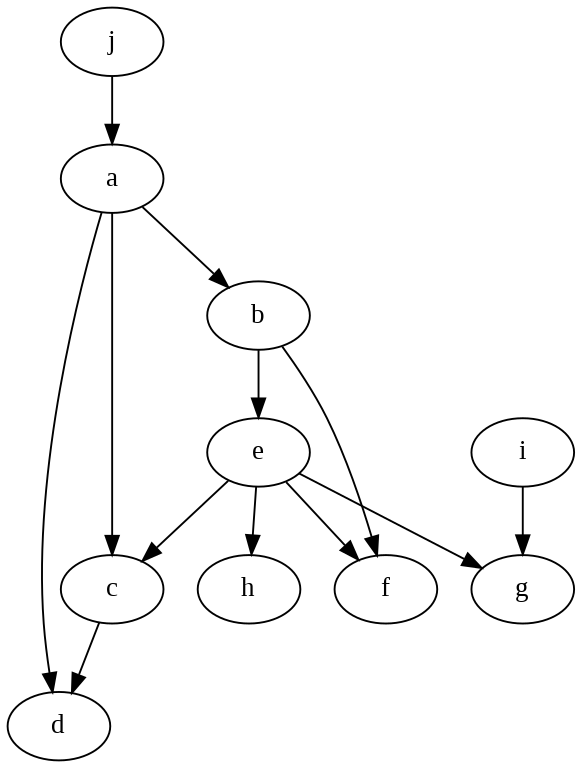

In [44]:
model = CausalModel(
            data=df,
            treatment=data["treatment_name"],
            outcome=data["outcome_name"],
            graph=graph_string,
        )
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))


In [45]:
refuter_object = model.refute_graph(k=1, independence_test = {'test_for_continuous': 'partial_correlation', 'test_for_discrete' : 'conditional_mutual_information'}) #Change k parameter to test conditional independence given different number of variables


The following setting with j as continuous, d as continuous, ('b', 'a') as ['continuous', 'discrete'] not supported
The following setting with j as continuous, d as continuous, ('e', 'a') as ['binary', 'discrete'] not supported
The following setting with j as continuous, d as continuous, ('f', 'a') as ['discrete', 'discrete'] not supported
The following setting with j as continuous, d as continuous, ('g', 'a') as ['continuous', 'discrete'] not supported
The following setting with j as continuous, d as continuous, ('i', 'a') as ['continuous', 'discrete'] not supported
The following setting with j as continuous, d as continuous, ('a', 'c') as ['discrete', 'binary'] not supported
The following setting with j as continuous, d as continuous, ('a', 'h') as ['discrete', 'discrete'] not supported
The following setting with j as continuous, b as continuous, ('d', 'a') as ['continuous', 'discrete'] not supported
The following setting with j as continuous, b as continuous, ('e', 'a') as ['binary'

In [46]:
print(refuter_object)

Method name for discrete data:conditional_mutual_information
Method name for continuous data:partial_correlation
Number of conditional independencies entailed by model:359
Number of independences satisfied by data:144
Test passed:False

